### Importing the necessary modules 

In [1]:
import sys
print("Python Version:", sys.version)

Python Version: 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [2]:
import platform
system_info = platform.uname()
print("System Information:")
print("- System:", system_info.system)
print("- Node Name:", system_info.node)
print("- Release:", system_info.release)
print("- Version:", system_info.version)
print("- Machine:", system_info.machine)
print("- Processor:", system_info.processor)


System Information:
- System: Windows
- Node Name: DESKTOP-0B0G78I
- Release: 10
- Version: 10.0.22621
- Machine: AMD64
- Processor: Intel64 Family 6 Model 126 Stepping 5, GenuineIntel


In [3]:
from __future__ import print_function

import numpy as np
from sklearn import datasets, neighbors, linear_model, tree
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, fetch_olivetti_faces
from sklearn.model_selection import train_test_split 
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

### Preparing the dataset 
The dataset we choose is a modified  version of the [Iris dataset](https://archive.ics.uci.edu/ml/datasets/Iris). We choose only the first two input feature dimensions viz _sepal-length_ and _sepal-width_ (both in cm) for ease of visualization. 

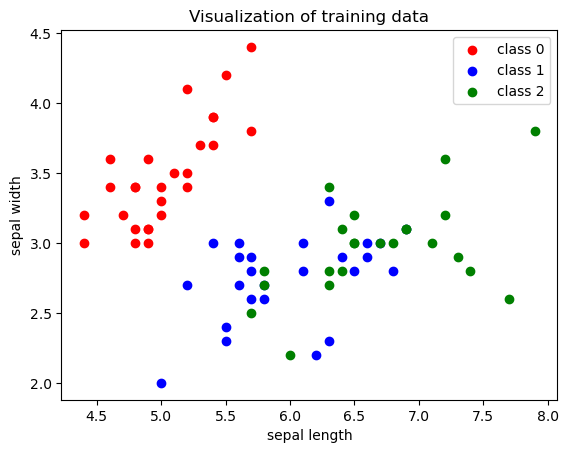

In [4]:
iris = load_iris()
X = iris.data[:,:2] #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)

#Splitting into training and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.75)
x_train = X[random_indices[:75]]
y_train = Y[random_indices[:75]]
#Test set
x_test = X[random_indices[75:]]
y_test = Y[random_indices[75:]]

#Visualizing the training data
X_class0 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0]) 
Y_class0 = np.zeros((X_class0.shape[0]),dtype=np.int32)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int32)
X_class2 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==2])
Y_class2 = np.full((X_class2.shape[0]),fill_value=2,dtype=np.int32)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Visualization of training data')
plt.show()

Note that the first class is linearly separable from the other two classes but the second and third classes are not linearly separable from each other.

### KNN algorithm 
The k-Nearest Neighbors (k-NN) algorithm is a simple yet effective supervised machine learning algorithm used for classification and regression tasks. It's a type of instance-based learning where the algorithm memorizes the entire training dataset instead of learning a model. When you want to make a prediction for a new data point, k-NN looks at the k-nearest data points (neighbors) from the training dataset and makes predictions based on their class (for classification) or their values (for regression).The K-nearest neighbor is a non-parametric learning algorithm and does not learn an parameterized function that maps the input to the output. Rather it looks up the training set every time it is asked to classify/or estimate a point and finds out the K nearest neighbors of the query point. The class corresponding to majority of the points/or average  is output as the class of the query point.

In [5]:
model = neighbors.KNeighborsClassifier(n_neighbors = 5) #number of nearest points to look for chosen as 5 
model.fit(x_train,y_train) 
#The usage of "fit" in KNN is somewhat misleading and stems from the scikit-learn library's consistent API design.
#The fit method doesn't learn a traditional model with parameters. Instead, it stores the 
#training data x_train and y_train. In KNN, the algorithm's "training" essentially consists of memorizing the training dataset.

KNeighborsClassifier()

Visualize the working of the algorithm
-------------------------------
Let's see how the algorithm works.
We choose the first point in the test set as our query point.

In [6]:
qry_point = np.array([5.9,2.9]) 
true_class_qry_pt = 1 
pred_class_qry_pt = model.predict([qry_point])
print(f"query point is: {qry_point}\nIts predicted class is: {pred_class_qry_pt}")

query point is: [5.9 2.9]
Its predicted class is: [1]


Visualizing the query point and its 5 nearest neighbors.

In [7]:
neighbors_object = neighbors.NearestNeighbors(n_neighbors = 5) 
neighbors_object.fit(x_train) 
distances_of_nearest_neighbors, indices_of_nearest_neighbors_of_query_point = neighbors_object.kneighbors([qry_point])
nearest_neighbors_of_query_point = x_train[indices_of_nearest_neighbors_of_query_point][0] 
print(f"query point is: {qry_point}")
print(f"nearest neighbors of query point are: {nearest_neighbors_of_query_point}")
print(f"classes of nearest neighbors are: {y_train[indices_of_nearest_neighbors_of_query_point][0]}")
print(f"predicted class of query point: {pred_class_qry_pt}")

query point is: [5.9 2.9]
nearest neighbors of query point are: [[5.8 2.8]
 [5.7 2.9]
 [6.1 3. ]
 [6.1 2.8]
 [5.8 2.7]]
classes of nearest neighbors are: [2 1 1 1 2]
predicted class of query point: [1]


You can see out of 5 nearest neighbors, three of them are having class 1 and rest two have class 2. so majority voting will 
give predicted class of query point to be 1. 

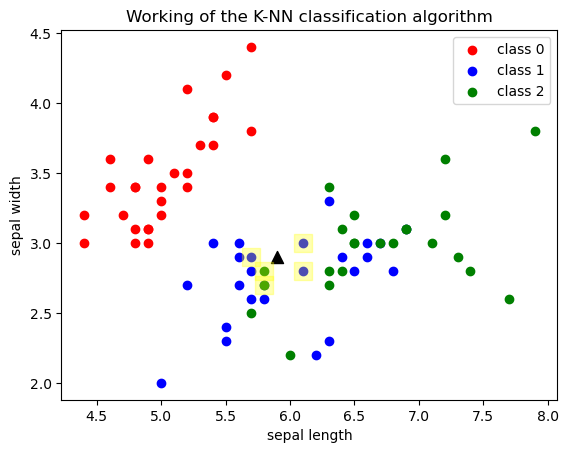

In [8]:
plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.scatter(X_class2[:,0], X_class2[:,1],color='green')
plt.scatter(qry_point[0], qry_point[1],marker='^',s=75,color='black')
plt.scatter(nearest_neighbors_of_query_point[:,0], nearest_neighbors_of_query_point[:,1],marker='s',s=150,color='yellow',alpha=0.30)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1','class 2'])
plt.title('Working of the K-NN classification algorithm')
plt.show()

There we can see the '^' indicates the position of query point in 2 dimensional feature space. 
2 Green dots for class 2 and 2 blue dots for class 1 (note there is overlap of a point, so we are not able to see the third point) 

### Evaluate the performance 

In [9]:
def evaluate_performance(model, x_test, y_test):
    test_set_predictions = [model.predict(x_test[i].reshape((1,len(x_test[i]))))[0] for i in range(x_test.shape[0])]
    test_misclassification_percentage = 0
    for i in range(len(test_set_predictions)):
        if test_set_predictions[i]!=y_test[i]:
            test_misclassification_percentage+=1
    test_misclassification_percentage *= 100/len(y_test)
    return test_misclassification_percentage

In [10]:
#Evaluate the performances on the validation and test sets
print("Evaluating K-NN classifier:")
test_err = evaluate_performance(model, x_test, y_test)
print('test misclassification percentage = {}%'.format(test_err))

Evaluating K-NN classifier:
test misclassification percentage = 17.333333333333332%


### PCA for face recognition 

Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in machine learning and data analysis. It's a mathematical method that transforms high-dimensional data into a lower-dimensional representation while preserving the most important information in the data. PCA is used in various fields, including image processing and face recognition. 
#### How PCA works: 
1. **Data Preprocessing**: PCA begins by standardizing the dataset to have a mean of 0 and a standard deviation of 1. This step ensures that all variables contribute equally to the analysis.

2. **Covariance Matrix**: calculates the covariance matrix of the standardized data. The covariance matrix describes the relationships between different features in the data.

3. **Eigenvalue Decomposition**: PCA then performs eigenvalue decomposition on the covariance matrix. This results in a set of eigenvalues and corresponding eigenvectors.

4. **Selecting Principal Components**: The eigenvectors with the highest eigenvalues (principal components) capture the most variance in the data. PCA allows you to choose how many principal components to retain, which determines the dimensionality of the reduced dataset.

5. **Projection**: The original data is projected onto the subspace defined by the selected principal components. This projection reduces the dimensionality while retaining as much information as possible.

### How PCA can be used in face recognition 
PCA is commonly used in face recognition for feature extraction and dimensionality reduction. Here's how it's applied:

1. **Feature Extraction**: In face recognition, each face image can be considered as a high-dimensional vector of pixel values. However, many of these dimensions are not informative for distinguishing between different faces. PCA is used to reduce the dimensionality of face images by finding the principal components that capture the most relevant facial features.

2. **Eigenfaces**: The principal components obtained through PCA are often referred to as "eigenfaces." These eigenfaces represent the most significant variations in facial appearance across the dataset.

3. **Face Representation**: Each face image can be represented as a linear combination of eigenfaces. This compact representation retains essential information about the face while reducing the dimensionality significantly.

4. **Recognition**: In the reduced feature space, face recognition algorithms, such as k-nearest neighbors (KNN) or support vector machines (SVM), can be applied for classification. The reduced dimensionality speeds up the recognition process and improves its efficiency.

### Load dataset 
We will use the [Olivetti Faces](http://scikit-learn.org/stable/datasets/olivetti_faces.html) dataset. It has 10 faces each of 40 number of images of size 64x64.

In [11]:
faces_data = fetch_olivetti_faces()

In [12]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print(f"Number of samples: {n_samples}, \nHeight of each image: {height}, \nWidth of each image: {width}, \nNumber of input features: {n_features},\nNumber of output classes: {n_classes}\n")

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



Shuffle the data randomly and make train and test splits
--------------------------------------------------------

In [13]:
# Split into a training set (75%) and a test set (25%) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
print(X_train)

[[0.19008264 0.19421488 0.11157025 ... 0.38016528 0.338843   0.33471075]
 [0.48347107 0.5206612  0.59090906 ... 0.13636364 0.11570248 0.09917355]
 [0.6280992  0.60330576 0.6280992  ... 0.15289256 0.11157025 0.10743801]
 ...
 [0.61157024 0.6446281  0.6570248  ... 0.17768595 0.2107438  0.2231405 ]
 [0.28512397 0.29338843 0.29752067 ... 0.53305787 0.53305787 0.5371901 ]
 [0.3264463  0.1446281  0.2603306  ... 0.14049587 0.30165288 0.1570248 ]]


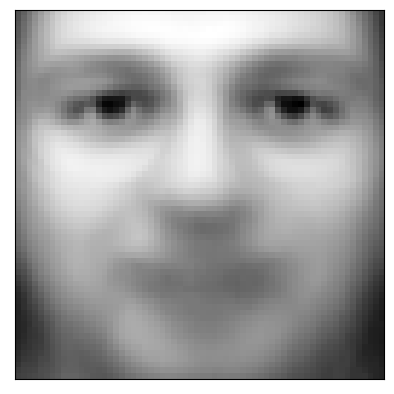

In [15]:
mean_image = np.mean(X_train,axis=0) 
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

this line: mean_image = np.mean(X_train,axis=0) 
- calculates the mean image by taking the element-wise mean of all the images along the specified axis (axis=0). The result is a single mean image, which is also a 64x64 pixel grayscale image.

### Visualization of the images 

In [16]:
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**Visualization of Training images** 

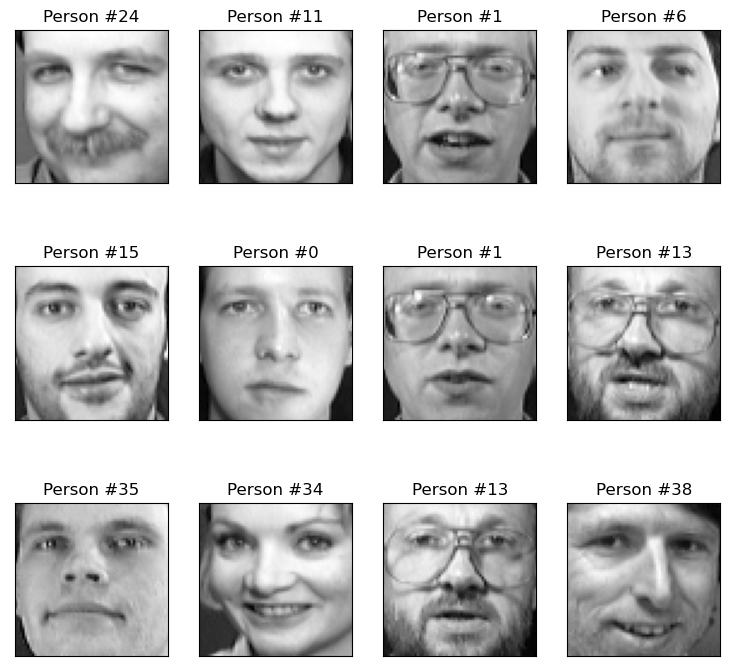

In [17]:
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images, height, width, titles)

### Calculation of eigen faces 
We find the eigen vectors corresponding to the biggest eigen values of the covariance matrix of the data. These eigen vectors are the directions along which the data shows maximum amount of variation. Each eigen vector can be considered as an eigen face. We can represent any image in the dataset as a linear combination of these eigen faces with minimum error. 

In [18]:
#Reduce the dimensionality of the feature space
n_components = 150

#Finding the top n_components principal components in the data
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))

### Visualization of eigen faces 

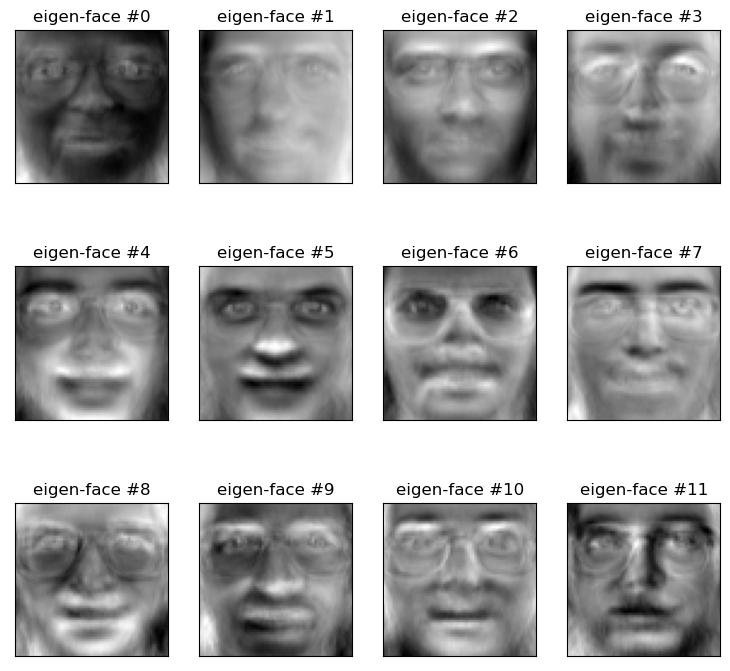

In [19]:
titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

### Transform the data to the vector space spanned by the eigen faces

In [20]:
#Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


### Use a KNN-Classifier in this transformed space to identify the faces

In [21]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(X_train_pca, y_train)

#Detect faces in the test set
y_pred_test = knn_classifier.predict(X_test_pca)
correct_count = 0.0
for i in range(len(y_test)):
    if y_pred_test[i] == y_test[i]:
        correct_count += 1.0
accuracy = correct_count/float(len(y_test))
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test, labels=range(n_classes)))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2
           3       1.00      0.25      0.40         4
           4       0.50      1.00      0.67         3
           5       0.75      1.00      0.86         3
           6       0.00      0.00      0.00         1
           7       1.00      0.29      0.44         7
           8       0.50      1.00      0.67         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      0.25      0.40         4
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         1
          14       0.25      1.00      0.40         3
          15       1.00      0.50      0.67         2
          17       0.67      0.67      0.67         3
          18

C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\prasa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The above warning is because there are no predicted samples for some class and we are gonna use their f1-score and precision(which is by default it is set to be zero) 

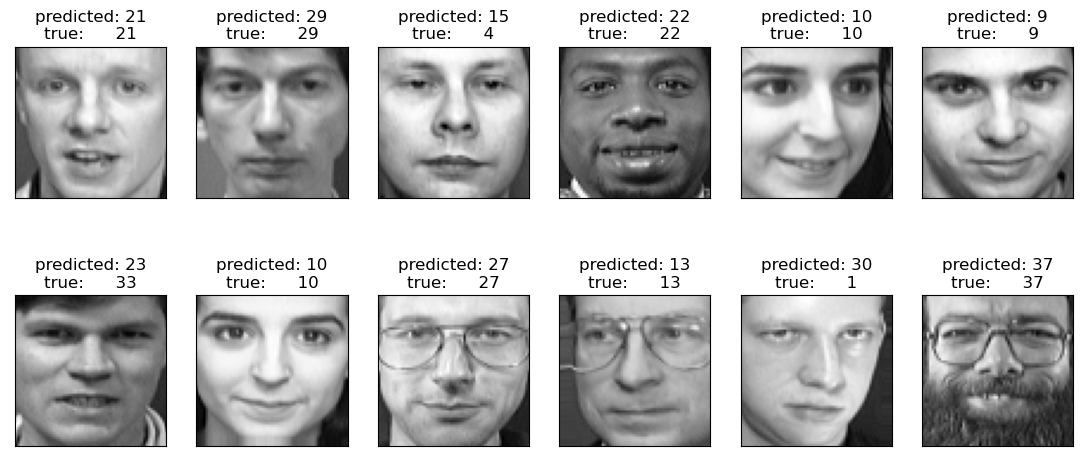

In [22]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
target_names = [str(element) for element in np.arange(40)+1]
prediction_titles = [title(y_pred_test, y_test, target_names, i)
                     for i in range(y_pred_test.shape[0])]
plot_gallery(X_test, height, width, prediction_titles, n_row=2, n_col=6)
plt.show()